In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [5]:
#Reading the data for prediction in csv format
df2015= pd.read_csv('BTC_USD_2015-01-02_2015-12-30-CoinDesk.csv')
df2016= pd.read_csv('BTC_USD_2016-01-02_2016-12-30.csv')
df2017= pd.read_csv('BTC_USD_2017-01-02_2017-12-30.csv')
df2018= pd.read_csv('BTC_USD_2018-01-02_2018-12-31.csv')
df2019= pd.read_csv('BTC_USD_2019-01-03_2019-12-31.csv')
df2020= pd.read_csv('BTC_USD_2020-01-03_2020-12-31.csv')
dfs=[df2015,df2016,df2017,df2018,df2019,df2020]
dfCrypto=pd.concat(dfs,ignore_index=True)

In [6]:
dfCrypto

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2015-01-02,314.498990,317.204000,317.315990,312.567000
1,BTC,2015-01-03,311.140990,314.498990,315.565990,310.156000
2,BTC,2015-01-04,277.853000,311.140990,312.288000,275.952000
3,BTC,2015-01-05,270.813000,277.853000,286.243000,257.022000
4,BTC,2015-01-06,272.017500,270.813000,277.971990,265.240000
...,...,...,...,...,...,...
2175,BTC,2020-12-27,26381.296233,24708.206784,26750.879954,24497.410869
2176,BTC,2020-12-28,26389.290265,26447.708072,28352.627824,25759.068609
2177,BTC,2020-12-29,26718.029463,26226.066130,27447.551384,26046.625578
2178,BTC,2020-12-30,26975.729565,27038.735676,27169.225558,25875.049786


In [7]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [9]:
#Required data for prediction 
newdata=dfCrypto[['Date','Closing Price (USD)']]
newdata['Date'] = pd.to_datetime(newdata['Date'])
newdata

<ipython-input-9-692a94ea19a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['Date'] = pd.to_datetime(newdata['Date'])


,Date,Closing Price (USD)
0,2015-01-02,314.498990
1,2015-01-03,311.140990
2,2015-01-04,277.853000
3,2015-01-05,270.813000
4,2015-01-06,272.017500
...,...,...
2175,2020-12-27,26381.296233
2176,2020-12-28,26389.290265
2177,2020-12-29,26718.029463
2178,2020-12-30,26975.729565


In [10]:
#Making Date index values 
new_data=newdata.set_index(['Date'])

In [11]:
new_data

,Closing Price (USD)
Date,
2015-01-02,314.498990
2015-01-03,311.140990
2015-01-04,277.853000
2015-01-05,270.813000
2015-01-06,272.017500
...,...
2020-12-27,26381.296233
2020-12-28,26389.290265
2020-12-29,26718.029463


In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2180 entries, 2015-01-02 to 2020-12-31
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Closing Price (USD)  2180 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [13]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:1224,:]
valid = dataset[1224:,:]

In [14]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train

array([[[0.00423957],
        [0.00412206],
        [0.00295715],
        ...,
        [0.00201862],
        [0.00205002],
        [0.00229208]],

       [[0.00412206],
        [0.00295715],
        [0.00271078],
        ...,
        [0.00205002],
        [0.00229208],
        [0.00270901]],

       [[0.00295715],
        [0.00271078],
        [0.00275293],
        ...,
        [0.00229208],
        [0.00270901],
        [0.00296639]],

       ...,

       [[0.31731247],
        [0.26955405],
        [0.27457981],
        ...,
        [0.31963408],
        [0.30539832],
        [0.28748445]],

       [[0.26955405],
        [0.27457981],
        [0.28042232],
        ...,
        [0.30539832],
        [0.28748445],
        [0.28867008]],

       [[0.27457981],
        [0.28042232],
        [0.26157522],
        ...,
        [0.28748445],
        [0.28867008],
        [0.28715213]]])

In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1,verbose=2)

1164/1164 - 25s - loss: 0.0011


In [16]:
#predicting remaining values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [18]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

671.4486148334589

<ipython-input-20-3038f676621e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


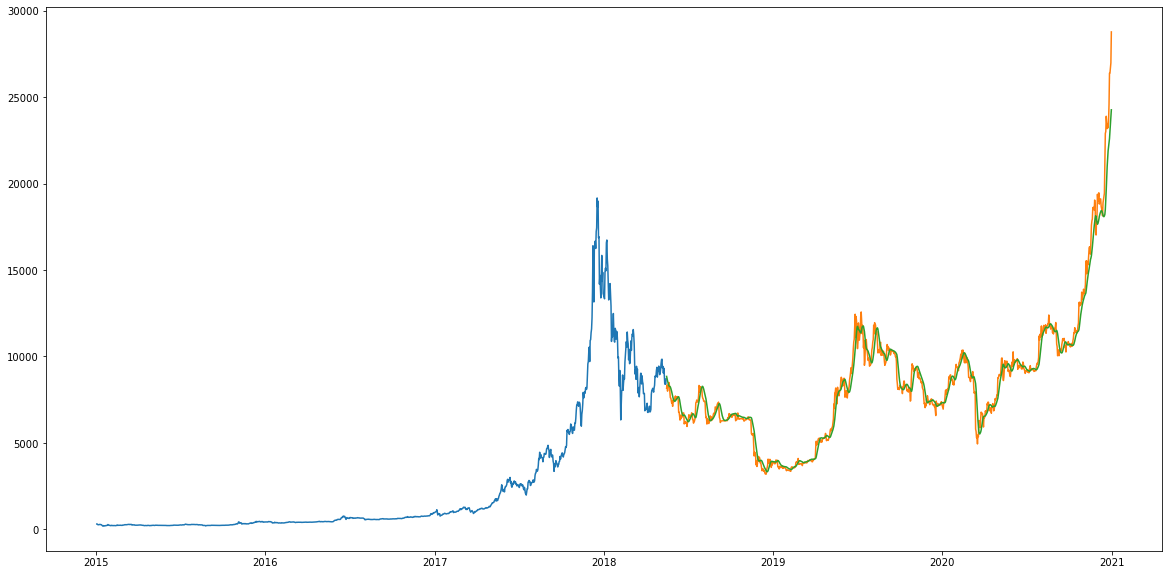

In [20]:
#for plotting
train = new_data[:1224]
valid = new_data[1224:]
valid['Predictions'] = closing_price
plt_1 = plt.figure(figsize=(20, 10))
plt.plot(train['Closing Price (USD)'])
plt.plot(valid[['Closing Price (USD)','Predictions']])

In [21]:
print(valid[['Closing Price (USD)','Predictions']])

            Closing Price (USD)   Predictions
Date                                         
2018-05-16          8159.256250   8848.646484
2018-05-17          8360.228750   8709.586914
2018-05-18          7996.821250   8593.580078
2018-05-19          8237.342500   8467.811523
2018-05-20          8250.395000   8371.045898
...                         ...           ...
2020-12-27         26381.296233  22597.341797
2020-12-28         26389.290265  22988.349609
2020-12-29         26718.029463  23414.626953
2020-12-30         26975.729565  23849.201172
2020-12-31         28768.836208  24264.621094

[956 rows x 2 columns]
